In [22]:
import numpy as np
import matplotlib.pyplot as plt 

In [27]:
MUTATION_RATE = 0.003
CROSS_RATE = 0.8
POP_SIZE = 100
DNA_SIZE = 10
X_BOUND = [0,5]
N_GENERATION = 100

In [28]:
def F(x): 
    return np.sin(10*x)*x + np.cos(2*x)*x     

def get_fitness(pred): 
    return pred + 1e-3 - np.min(pred)

def translateDNA(pop):
    return pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2**DNA_SIZE-1) * X_BOUND[1]

def select(pop, fitness):    # nature selection wrt pop's fitness
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,
                           p=fitness/fitness.sum())
    return pop[idx]

def crossover(parent, pop):     # mating process (genes crossover)
    if np.random.rand() < CROSS_RATE:
        i_ = np.random.randint(0, POP_SIZE, size=1)                             # select another individual from pop
        cross_points = np.random.randint(0, 2, size=DNA_SIZE).astype(np.bool)   # choose crossover points
        parent[cross_points] = pop[i_, cross_points]                            # mating and produce one child
    return parent

def mutate(child):
    for point in range(DNA_SIZE):
        if np.random.rand() < MUTATION_RATE:
            child[point] = 1 if child[point] == 0 else 0
    return child

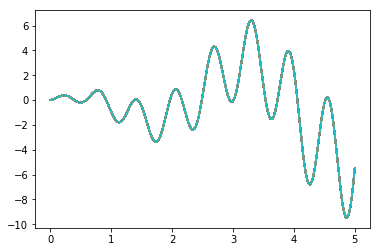

In [29]:
pop = np.random.randint(2, size =(POP_SIZE ,DNA_SIZE))
plt.ion

for i in range(N_GENERATION):
    x = np.linspace(*X_BOUND, 200)
    plt.plot(x, F(x))
    
    F_values = F(translateDNA(pop))
    fitness = get_fitness(F_values)
    choice = select(pop,fitness)
    pop_copy = pop.copy
    
    for parent in choice :
        child = crossover(parent,choice)
        child = mutate(child)
        parent[:] = child 
    
plt.ioff(); plt.show()    